# Homework - CNN (Week 7)

In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2025-07-17 10:47:48.773056: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-17 10:47:48.788931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-17 10:47:48.813588: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-17 10:47:48.813627: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-17 10:47:48.828633: I tensorflow/core/platform/cpu_feature_gua

In [2]:
import tensorflow as tf
tf.__version__

'2.16.2'

In [3]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
train_dir = 'data/train'
test_dir = 'data/test'

In [5]:
model = models.Sequential()
model.add(layers.Input(shape=(200,200,3)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2025-07-17 10:47:50.894959: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-17 10:47:50.944854: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-17 10:47:50.948240: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Best Loss Function is binary crossentropy.

## Question 2

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 313632)            0         
                                                                 
 dense (Dense)               (None, 64)                20072512  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20073473 (76.57 MB)
Trainable params: 20073473 (76.57 MB)
Non-trainable params: 0 (0.00 Byte)
______________

20073473

## Question 3 & 4

In [7]:
train_gen = ImageDataGenerator(rescale=1./255) 

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

val_gen = ImageDataGenerator(rescale=1./255) 

val_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)


In [11]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


2025-07-17 10:49:44.156834: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1752749399.503565    3663 service.cc:145] XLA service 0x7efbffe1a680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752749399.503600    3663 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752749400.158223    3663 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 [==============================] - 40s 168ms/step - loss: 0.6948 - acc: 0.5300 - val_loss: 0.6974 - val_acc: 0.5124
Epoch 2/10
40/40 [==============================] - 5s 133ms/step - loss: 0.6609 - acc: 0.6025 - val_loss: 0.6795 - val_acc: 0.5771
Epoch 3/10
40/40 [==============================] - 5s 136ms/step - loss: 0.6117 - acc: 0.6812 - val_loss: 0.6240 - val_acc: 0.6368
Epoch 4/10
40/40 [==============================] - 5s 135ms/step - loss: 0.5716 - acc: 0.6925 - val_loss: 0.6271 - val_acc: 0.6567
Epoch 5/10
40/40 [==============================] - 5s 135ms/step - loss: 0.5724 - acc: 0.6925 - val_loss: 0.6121 - val_acc: 0.6368
Epoch 6/10
40/40 [==============================] - 5s 136ms/step - loss: 0.5362 - acc: 0.7325 - val_loss: 0.6331 - val_acc: 0.6368
Epoch 7/10
40/40 [==============================] - 5s 136ms/step - loss: 0.5438 - acc: 0.7125 - val_loss: 0.6149 - val_acc: 0.6517
Epoch 8/10
40/40 [==============================] - 5s 134ms/step - loss: 0.5177 - acc

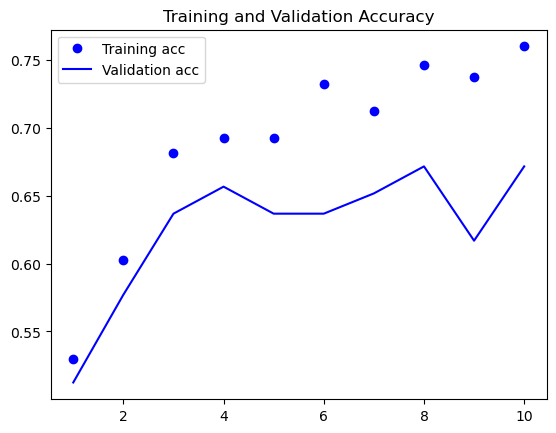

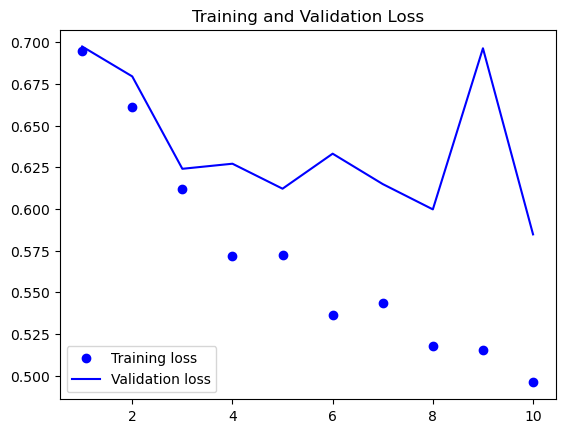

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [25]:
np.median(acc)

0.7024999856948853

In [26]:
np.std(loss)

0.06210338383520194

## Question 5 & 6

In [29]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


In [31]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
40/40 [==============================] - 11s 284ms/step - loss: 0.6121 - acc: 0.6438 - val_loss: 0.5804 - val_acc: 0.6766
Epoch 2/10
40/40 [==============================] - 11s 284ms/step - loss: 0.5998 - acc: 0.6687 - val_loss: 0.5758 - val_acc: 0.6716
Epoch 3/10
40/40 [==============================] - 11s 277ms/step - loss: 0.6041 - acc: 0.6687 - val_loss: 0.5711 - val_acc: 0.6766
Epoch 4/10
40/40 [==============================] - 11s 282ms/step - loss: 0.5988 - acc: 0.6587 - val_loss: 0.5975 - val_acc: 0.6965
Epoch 5/10
40/40 [==============================] - 11s 281ms/step - loss: 0.6035 - acc: 0.6787 - val_loss: 0.5873 - val_acc: 0.6617
Epoch 6/10
40/40 [==============================] - 11s 278ms/step - loss: 0.5999 - acc: 0.6737 - val_loss: 0.5963 - val_acc: 0.6816
Epoch 7/10
40/40 [==============================] - 11s 279ms/step - loss: 0.5942 - acc: 0.6762 - val_loss: 0.5788 - val_acc: 0.7114
Epoch 8/10
40/40 [==============================] - 11s 281ms/step - 

In [32]:
val_loss = history.history['loss']

In [33]:
np.mean(val_loss)

0.5946123719215393

In [39]:
val_acc = history.history['val_acc'][:-5]

In [41]:
np.mean(val_acc)

0.676616907119751